In [ ]:
import acados
import importlib

importlib.reload(acados)

<module 'acados' from '/home/amon/Repositories/l4acados/examples/l4casadi_vs_l4acados/acados.py'>

In [ ]:
from acados import (
    run,
    NaiveMultiLayerPerceptron,
    MultiLayerPerceptron,
    DoubleIntegratorWithLearnedDynamics,
    MPC,
)
import l4casadi as l4c
import numpy as np
import time
import l4acados as l4a
from typing import Optional, Union
import torch
import casadi as cs

In [ ]:
from l4acados.controllers.residual_learning_mpc import ResidualLearningMPC
from l4acados.models import ResidualModel, PyTorchFeatureSelector
from l4acados.controllers.zoro_acados_utils import setup_sim_from_ocp

In [ ]:
import copy

In [ ]:
from run_single_experiment import *

In [ ]:
N = 1
batch_dim = 1
# hidden_layers = 2
# hidden_size = 2048
# hidden_layers = 64
# hidden_size = 256
hidden_layers = 1
hidden_size = 256
# hidden_layers = 1
# hidden_size = 1024
# hidden_layers = 16
# hidden_size = 256
warmup_iter = 10
solve_steps = 10000
num_threads = 1
device = "cpu"
# device = "cuda"
num_threads_acados_openmp = 0
run_methods = ["l4casadi", "l4casadi_naive", "l4acados"]
# run_methods = ["l4acados"]

In [ ]:
hidden_layers

1

In [ ]:
n_inputs = 2
n_outputs = 1

# check number of parameters in NN
mlp = MultiLayerPerceptron(
    n_inputs=n_inputs,
    n_outputs=n_outputs,
    hidden_layers=hidden_layers,
    hidden_size=hidden_size,
)
num_params = sum(p.numel() for p in mlp.parameters())

mlp_naive = NaiveMultiLayerPerceptron(
    n_inputs=n_inputs,
    n_outputs=n_outputs,
    hidden_layers=hidden_layers,
    hidden_size=hidden_size,
)
num_params_naive = sum(p.numel() for p in mlp_naive.parameters())

count_params = lambda n_inputs, n_outputs, hidden_layers, hidden_size: (
    (n_inputs + n_outputs + hidden_layers + 1) * hidden_size
    + (hidden_layers) * (hidden_size**2)
    + 1
)  # + 1 for bias in output layer

num_params_fun = count_params(
    n_inputs=n_inputs,
    n_outputs=n_outputs,
    hidden_layers=hidden_layers,
    hidden_size=hidden_size,
)

num_params, num_params_naive, num_params_fun

(66817, 66817, 66817)

In [ ]:
hidden_layers_2 = 4**2
hidden_size_2 = np.sqrt(hidden_size**2 / hidden_layers_2)

params_2 = count_params(
    n_inputs=n_inputs,
    n_outputs=n_outputs,
    hidden_layers=hidden_layers_2,
    hidden_size=hidden_size_2,
)

params_2, hidden_size_2, hidden_layers_2

(np.float64(66817.0), np.float64(64.0), 16)

In [ ]:
params / params_2

np.float64(1.0)

In [ ]:
# hidden_layers = int(hidden_layers_2)
# hidden_size = int(hidden_size_2)

results_dict = run(
    N,
    hidden_layers,
    hidden_size,
    solve_steps,
    device=device,
    num_threads=num_threads,
    num_threads_acados_openmp=num_threads_acados_openmp,
    save_data=True,
    run_methods=run_methods,
)

CMake Deprecation Warning at CMakeLists.txt:32 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


CMake Deprecation Warning at external/blasfeo/CMakeLists.txt:36 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.




-- Build type is Release
-- ACADOS_WITH_OPENMP: OFF
-- Using linear algebra: HIGH_PERFORMANCE
-- Using matrix format: PANELMAJ
-- Using external BLAS: 0
-- Testing target X64_INTEL_HASWELL: assembly compilation [success]
-- Testing target X64_INTEL_HASWELL: assembly run [success]
-- Testing target X64_INTEL_HASWELL: intrinsic compilation [success]
-- Testing target X64_INTEL_HASWELL: intrinsic run [success]
-- Detected target X64_INTEL_HASWELL
-- Using BLASFEO path: 
-- Installation directory: /home/amon/Repositories/l4acados/external/acados
--  
-- Target: BLASFEO is X64_AUTOMATIC, HPIPM is X64_AUTOMATIC
-- Linear algebra: HIGH_PERFORMANCE
-- Octave MEX (OFF)
-- System name:version Linux:6.9.3-76060903-generic
-- Build type is Release
-- Installation directory is /home/amon/Repositories/l4acados/external/acados
-- OpenMP parallelization is OFF
--  
-- Configuring done (0.3s)
-- Generating done (0.0s)
-- Build files have been written to: /home/amon/Repositories/l4acados/external/acados

CMake Deprecation Warning at external/hpipm/CMakeLists.txt:36 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


/home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/torch/jit/_check.py:178: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(


field AcadosOcpDims.N has been migrated to AcadosOcpOptions.N_horizon. setting AcadosOcpOptions.N_horizon = N. For future comppatibility, please use AcadosOcpOptions.N_horizon directly.
 If there is an incompatibility with the CasADi generated code, please consider changing your CasADi version.
Version 3.6.7 currently in use.
rm -f libacados_ocp_solver_wr.so
rm -f acados_solver_wr.o
cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/l4acados/external/acados/include -I/home/amon/Repositories/l4acados/external/acados/include/acados -I/home/amon/Repositories/l4acados/external/acados/include/blasfeo/include -I/home/amon/Repositories/l4acados/external/acados/include/hpipm/include  -c -o acados_solver_wr.o acados_solver_wr.c
cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/l4acados/external/acados/include -I/home/amon/Repositories/l4acados/external/acados/include/acados -I/home/amon/Repositories/l4acados/external/acados/include/blasfeo/include -I/home/amon/Repositories/l4acados/external/acad

make: *** No rule to make target 'clean_all'.  Stop.


cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/l4acados/external/acados/include -I/home/amon/Repositories/l4acados/external/acados/include/acados -I/home/amon/Repositories/l4acados/external/acados/include/blasfeo/include -I/home/amon/Repositories/l4acados/external/acados/include/hpipm/include  -c -o acados_solver_linear_model_with_params_nx2_nu1_np0.o acados_solver_linear_model_with_params_nx2_nu1_np0.c
cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/l4acados/external/acados/include -I/home/amon/Repositories/l4acados/external/acados/include/acados -I/home/amon/Repositories/l4acados/external/acados/include/blasfeo/include -I/home/amon/Repositories/l4acados/external/acados/include/hpipm/include  -c -o linear_model_with_params_nx2_nu1_np0_model/linear_model_with_params_nx2_nu1_np0_dyn_disc_phi_fun.o linear_model_with_params_nx2_nu1_np0_model/linear_model_with_params_nx2_nu1_np0_dyn_disc_phi_fun.c
cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/l4acados/external/acados/include -I/ho

In file included from /home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/numpy/_core/include/numpy/ndarraytypes.h:1909,
                 from /home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/numpy/_core/include/numpy/ndarrayobject.h:12,
                 from /home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/numpy/_core/include/numpy/arrayobject.h:5,
                 from acados_ocp_solver_pyx.c:1230:
/home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/numpy/_core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~


cc  -shared \
-o acados_ocp_solver_pyx.so \
-Wl,-rpath=/home/amon/Repositories/l4acados/external/acados/lib \
acados_ocp_solver_pyx.o \
/home/amon/Repositories/l4acados/examples/l4casadi_vs_l4acados/c_generated_code/libacados_ocp_solver_linear_model_with_params_nx2_nu1_np0.so \
-L/home/amon/Repositories/l4acados/external/acados/lib -lacados -lhpipm -lblasfeo -lm
 If there is an incompatibility with the CasADi generated code, please consider changing your CasADi version.
Version 3.6.7 currently in use.
rm -f libacados_sim_solver_wr_new.so
rm -f acados_sim_solver_wr_new.o
rm -f acados_sim_solver_pyx.so
rm -f acados_sim_solver_pyx.o
cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/l4acados/external/acados/include -I/home/amon/Repositories/l4acados/external/acados/include/acados -I/home/amon/Repositories/l4acados/external/acados/include/blasfeo/include -I/home/amon/Repositories/l4acados/external/acados/include/hpipm/include  -c -o acados_sim_solver_wr_new.o acados_sim_solver_wr_new.c
cc -

In file included from /home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/numpy/_core/include/numpy/ndarraytypes.h:1909,
                 from /home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/numpy/_core/include/numpy/ndarrayobject.h:12,
                 from /home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/numpy/_core/include/numpy/arrayobject.h:5,
                 from acados_sim_solver_pyx.c:1230:
/home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/numpy/_core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~


cc  -shared \
-o acados_sim_solver_pyx.so \
-Wl,-rpath=/home/amon/Repositories/l4acados/external/acados/lib \
acados_sim_solver_pyx.o \
/home/amon/Repositories/l4acados/examples/l4casadi_vs_l4acados/c_generated_code/libacados_sim_solver_wr_new.so \
-L/home/amon/Repositories/l4acados/external/acados/lib -lacados -lhpipm -lblasfeo -lm
Running timing experiment: 0/10000
Running timing experiment: 1/10000
Running timing experiment: 2/10000
Running timing experiment: 3/10000
Running timing experiment: 4/10000
Running timing experiment: 5/10000
Running timing experiment: 6/10000
Running timing experiment: 7/10000
Running timing experiment: 8/10000
Running timing experiment: 9/10000
Running timing experiment: 10/10000
Running timing experiment: 11/10000
Running timing experiment: 12/10000
Running timing experiment: 13/10000
Running timing experiment: 14/10000
Running timing experiment: 15/10000
Running timing experiment: 16/10000
Running timing experiment: 17/10000
Running timing experiment: 

In [ ]:
results_dict.keys()

dict_keys(['l4casadi_time_total', 'l4casadi_time_preparation', 'l4casadi_time_feedback', 'l4casadi_state_trajectory', 'l4casadi_time_preparation_extra', 'l4casadi_time_feedback_extra', 'l4casadi_naive_time_total', 'l4casadi_naive_time_preparation', 'l4casadi_naive_time_feedback', 'l4casadi_naive_state_trajectory', 'l4casadi_naive_time_preparation_extra', 'l4casadi_naive_time_feedback_extra', 'l4acados_time_total', 'l4acados_time_preparation', 'l4acados_time_feedback', 'l4acados_state_trajectory', 'l4acados_time_to_tensor', 'l4acados_time_residual_model', 'l4acados_time_nominal_model'])

In [ ]:
# load data
save_file = os.path.join(
    "data",
    f"l4casadi_vs_l4acados_N{N}_layers{hidden_layers}_size{hidden_size}_steps{solve_steps}_{device}_threads{num_threads}_acados{num_threads_acados_openmp}.npz",
)
results_dict = dict(np.load(save_file))

In [ ]:
results_dict.keys()

dict_keys(['l4casadi_time_total', 'l4casadi_time_preparation', 'l4casadi_time_feedback', 'l4casadi_state_trajectory', 'l4casadi_time_preparation_extra', 'l4casadi_time_feedback_extra', 'l4casadi_naive_time_total', 'l4casadi_naive_time_preparation', 'l4casadi_naive_time_feedback', 'l4casadi_naive_state_trajectory', 'l4casadi_naive_time_preparation_extra', 'l4casadi_naive_time_feedback_extra', 'l4acados_time_total', 'l4acados_time_preparation', 'l4acados_time_feedback', 'l4acados_state_trajectory', 'l4acados_time_to_tensor', 'l4acados_time_residual_model', 'l4acados_time_nominal_model'])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
keys_time = [key for key in results_dict.keys() if "time" in key]
for key_values in keys_time:
    results_dict[f"{key_values}_avg"] = np.cumsum(
        results_dict[key_values][warmup_iter:]
    ) / np.arange(1, len(results_dict[key_values][warmup_iter:]) + 1)

In [ ]:
results_dict.keys()

dict_keys(['l4casadi_time_total', 'l4casadi_time_preparation', 'l4casadi_time_feedback', 'l4casadi_state_trajectory', 'l4casadi_time_preparation_extra', 'l4casadi_time_feedback_extra', 'l4casadi_naive_time_total', 'l4casadi_naive_time_preparation', 'l4casadi_naive_time_feedback', 'l4casadi_naive_state_trajectory', 'l4casadi_naive_time_preparation_extra', 'l4casadi_naive_time_feedback_extra', 'l4acados_time_total', 'l4acados_time_preparation', 'l4acados_time_feedback', 'l4acados_state_trajectory', 'l4acados_time_to_tensor', 'l4acados_time_residual_model', 'l4acados_time_nominal_model', 'l4casadi_time_total_avg', 'l4casadi_time_preparation_avg', 'l4casadi_time_feedback_avg', 'l4casadi_time_preparation_extra_avg', 'l4casadi_time_feedback_extra_avg', 'l4casadi_naive_time_total_avg', 'l4casadi_naive_time_preparation_avg', 'l4casadi_naive_time_feedback_avg', 'l4casadi_naive_time_preparation_extra_avg', 'l4casadi_naive_time_feedback_extra_avg', 'l4acados_time_total_avg', 'l4acados_time_prepar

In [ ]:
results_dict["l4acados_time_preparation_avg"]

array([0.00049738, 0.00050291, 0.00050761, ..., 0.00071439, 0.00071438,
       0.00071437])

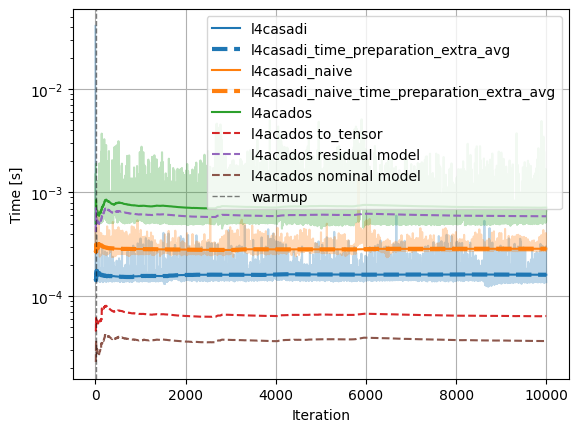

In [ ]:
keys_methods = ["l4casadi", "l4casadi_naive", "l4acados"]
# key_plot = "time_total"
key_plot = "time_preparation"
# key_plot = "time_feedback"
for key in keys_methods:
    key_avg = f"{key}_{key_plot}_avg"
    key_avg_extra = f"{key}_{key_plot}_extra_avg"
    if key_avg in results_dict.keys():
        h_plot = plt.plot(
            np.arange(warmup_iter, len(results_dict[key_avg]) + warmup_iter),
            results_dict[key_avg],
            label=key,
        )
    if key_avg_extra in results_dict.keys():
        h_plot = plt.plot(
            np.arange(warmup_iter, len(results_dict[key_avg]) + warmup_iter),
            results_dict[key_avg],
            label=key_avg_extra,
            color=h_plot[0].get_color(),
            linestyle="--",
            linewidth=3.0,
        )
    key_time = f"{key}_{key_plot}"
    if key_time in results_dict.keys():
        plt.plot(
            results_dict[key_time],
            color=h_plot[0].get_color(),
            alpha=0.3,
        )

# plot l4acados to_tensor_time
if "l4acados_time_to_tensor_avg" in results_dict.keys():
    plt.plot(
        np.arange(
            warmup_iter, len(results_dict["l4acados_time_to_tensor_avg"]) + warmup_iter
        ),
        results_dict["l4acados_time_to_tensor_avg"],
        label="l4acados to_tensor",
        linestyle="--",
    )

if "l4acados_time_residual_model_avg" in results_dict.keys():
    plt.plot(
        np.arange(
            warmup_iter,
            len(results_dict["l4acados_time_residual_model_avg"]) + warmup_iter,
        ),
        results_dict["l4acados_time_residual_model_avg"],
        label="l4acados residual model",
        linestyle="--",
    )

if "l4acados_time_nominal_model_avg" in results_dict.keys():
    plt.plot(
        np.arange(
            warmup_iter,
            len(results_dict["l4acados_time_nominal_model_avg"]) + warmup_iter,
        ),
        results_dict["l4acados_time_nominal_model_avg"],
        label="l4acados nominal model",
        linestyle="--",
    )

plt.axvline(
    x=warmup_iter, color="k", linestyle="--", linewidth=1, label="warmup", alpha=0.5
)
# axes scaling log
# plt.xscale("log")
plt.yscale("log")
# axes title y
plt.ylabel("Time [s]")
plt.xlabel("Iteration")
plt.legend()
# plt.ylim([1e-3, 1e-1])
plt.grid()

In [ ]:
results_dict.keys()

dict_keys(['l4casadi_time_total', 'l4casadi_time_preparation', 'l4casadi_time_feedback', 'l4casadi_state_trajectory', 'l4casadi_time_preparation_extra', 'l4casadi_time_feedback_extra', 'l4casadi_naive_time_total', 'l4casadi_naive_time_preparation', 'l4casadi_naive_time_feedback', 'l4casadi_naive_state_trajectory', 'l4casadi_naive_time_preparation_extra', 'l4casadi_naive_time_feedback_extra', 'l4acados_time_total', 'l4acados_time_preparation', 'l4acados_time_feedback', 'l4acados_state_trajectory', 'l4acados_time_to_tensor', 'l4acados_time_residual_model', 'l4acados_time_nominal_model', 'l4casadi_time_total_avg', 'l4casadi_time_preparation_avg', 'l4casadi_time_feedback_avg', 'l4casadi_time_preparation_extra_avg', 'l4casadi_time_feedback_extra_avg', 'l4casadi_naive_time_total_avg', 'l4casadi_naive_time_preparation_avg', 'l4casadi_naive_time_feedback_avg', 'l4casadi_naive_time_preparation_extra_avg', 'l4casadi_naive_time_feedback_extra_avg', 'l4acados_time_total_avg', 'l4acados_time_prepar

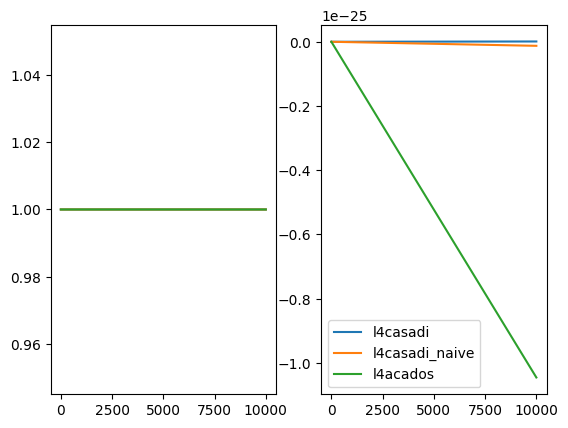

In [ ]:
fig, ax = plt.subplots(1, 2)

key_plot = "state_trajectory"
for key in keys_methods:
    key_state = f"{key}_{key_plot}"
    if key_state in results_dict.keys():
        for i in range(2):
            ax[i].plot(
                results_dict[key_state][:, i],
                label=key,
            )

plt.legend()

In [ ]:
diff_matrix = np.nan * np.ones((len(keys_methods), len(keys_methods)))
for i, key in enumerate(keys_methods):
    for j, key_2 in enumerate(keys_methods[i + 1 :]):
        j_2 = j + i + 1
        key_state_1 = f"{key}_{key_plot}"
        key_state_2 = f"{key_2}_{key_plot}"
        if key_state_1 in results_dict.keys() and key_state_2 in results_dict.keys():
            diff_matrix[i, j_2] = np.linalg.norm(
                np.array(results_dict[key_state_1])
                - np.array(results_dict[key_state_2]),
                ord=np.inf,
            )

diff_matrix, keys_methods

(array([[           nan, 1.35297570e-27, 1.04696200e-25],
        [           nan,            nan, 1.03343224e-25],
        [           nan,            nan,            nan]]),
 ['l4casadi', 'l4casadi_naive', 'l4acados'])